# ADM PROJECT

Importing Libraries

In [19]:

import pandas as pd 
import numpy as np
import seaborn as sns 
import nltk
nltk.download('wordnet')
import re 
import operator
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Input CSV

In [20]:
data = pd.read_csv('gender-classifier.csv',encoding = "latin1")

In [21]:
#Data Describtion
data.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


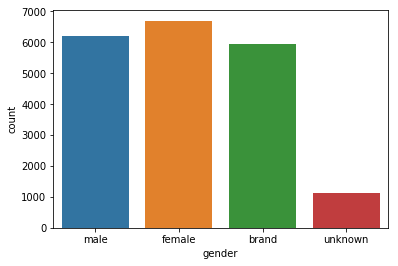

In [22]:
#Data Distribution based on dependant variable 'Gender'
sns.countplot(x="gender",data=data)

# MODEL 1

In [23]:
#Model 1 preprocessing is based on the parameter of the model Parameter are  fav_number','link_color','sidebar_color',
#'tweet_count','gender'

#Hex to RBG Converter For Color 
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

def model1Preprocessing(data):
    data1 = data[ (data["gender:confidence"]>0.7) & (data['gender']!='unknown') ]
    dataColorPred = data1.loc[:,['fav_number','link_color','sidebar_color','tweet_count','gender']]
    dataColorPred.shape
    dataColorPred_1 = dataColorPred[(dataColorPred.link_color.str.len() ==6) & (dataColorPred.sidebar_color.str.len() ==6)]
    dataColorPred_1.shape
    dataColorPred_1.reset_index(inplace=True)
    Link_color_array=np.array(dataColorPred_1['link_color'])
    SideBar_color_array=np.array(dataColorPred_1['sidebar_color'])
    r,b,g,r1,b1,g1=[],[],[],[],[],[]
    for i in range(dataColorPred_1['link_color'].count()):    
            temp='#' + Link_color_array[i]
            temp1=hex_to_rgb(temp)
            r.append(temp1[0]) 
            b.append(temp1[1])
            g.append(temp1[2])

    for i in range(dataColorPred_1['sidebar_color'].count()):    
            temp='#' + SideBar_color_array[i]
            temp1=hex_to_rgb(temp)
            r1.append(temp1[0]) 
            b1.append(temp1[1])
            g1.append(temp1[2])

    r=pd.Series(r)
    b=pd.Series(b)
    g=pd.Series(g)
    r1=pd.Series(r1)
    b1=pd.Series(b1)
    g1=pd.Series(g1)

    dataColorPred_2=pd.concat([r,b,g,r1,b1,g1],axis=1)
    dataColorPred_2=pd.concat([dataColorPred_1.loc[:,['fav_number','tweet_count','gender']],dataColorPred_2],axis=1,ignore_index=True)

    Y= dataColorPred_2.iloc[:,2]     
    X= dataColorPred_2.iloc[:,[0,1,3,4,5,6,7,8]] 
    ''' 
    from sklearn.preprocessing import StandardScaler
    scalar=StandardScaler()
    X=scalar.fit_transform(X)
    '''
    return X,Y


#Test and Train Split:

In [24]:
X,Y=model1Preprocessing(data)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.25,random_state=0)

Random Forest

In [25]:
#Random Forest the parameter has been set to best parameter values got in Grid Search CV
clfRModel1 = RandomForestClassifier(n_estimators=1000, max_depth=15,random_state=0)
clfRModel1.fit(xtrain,ytrain)
ypred = clfRModel1.predict(xtest)
print('Model 1 Random forest accuracy on test Dataset is:',accuracy_score(ytest,ypred)*100)
#Random forest cross validation accuracy
accuracies = cross_val_score(clfRModel1,xtrain,ytrain,cv=10)     
print('\n Random Forest accuracy using cross validation  on training data is',pd.Series.mean(pd.Series(accuracies))*100)
#Confusion Matrix:
print('\n Confusion Matrix: \n ')
print(confusion_matrix(ytest,ypred,labels=["brand","female","male"]))
#Printing Classification Report
print('\n Classification report: ')
print(classification_report(ytest,ypred))
#To check important features in Random Forest.
print('\n Importance of selected feature:',clfRModel1.feature_importances_)

Model 1 Random forest accuracy on test Dataset is: 56.627450980392155

 Random Forest accuracy using cross validation  on training data is 56.71419011500601

 Confusion Matrix: 
 
[[416 111 168]
 [ 95 581 318]
 [104 310 447]]

 Classification report: 
              precision    recall  f1-score   support

       brand       0.68      0.60      0.64       695
      female       0.58      0.58      0.58       994
        male       0.48      0.52      0.50       861

   micro avg       0.57      0.57      0.57      2550
   macro avg       0.58      0.57      0.57      2550
weighted avg       0.57      0.57      0.57      2550


 Importance of selected feature: [0.36831017 0.29407737 0.08264999 0.07343089 0.07544664 0.03607674
 0.03451862 0.03548958]


KNN Model

In [26]:
#KNN Tree k  parameter has been set to best parameter values got in Grid Search CV
from sklearn.neighbors import KNeighborsClassifier
KNNColorModel1 = KNeighborsClassifier(n_neighbors=30)
KNNColorModel1.fit(xtrain,ytrain)
ypred = KNNColorModel1.predict(xtest)
print('\n KNN accuracy on test Dataset is:',accuracy_score(ytest,ypred)*100)
cm=confusion_matrix(ytest,ypred)
print('\n Confusion Matrix')
print(cm)
print('\n Classification report: ')
print(classification_report(ytest,ypred))


 KNN accuracy on test Dataset is: 49.96078431372549

 Confusion Matrix
[[447 112 136]
 [189 542 263]
 [193 383 285]]

 Classification report: 
              precision    recall  f1-score   support

       brand       0.54      0.64      0.59       695
      female       0.52      0.55      0.53       994
        male       0.42      0.33      0.37       861

   micro avg       0.50      0.50      0.50      2550
   macro avg       0.49      0.51      0.50      2550
weighted avg       0.49      0.50      0.49      2550



Naive Bayes

In [27]:

from sklearn.naive_bayes import GaussianNB
NBColor = GaussianNB()
NBColor.fit(xtrain,ytrain)
ypred = NBColor.predict(xtest)
print('\n Naive Bayes accuracy on Unseen Dataset is:',accuracy_score(ytest,ypred)*100)
accuracies = cross_val_score(NBColor,xtrain,ytrain,cv=10)     
print('\n Naive Byes accuracy using cross validation  on training data is',pd.Series.mean(pd.Series(accuracies))*100)
cm=confusion_matrix(ytest,ypred)
print('\n Confusion Matrix')
print(cm)
print('\n Classification report: ')
print(classification_report(ytest,ypred))


 Naive Bayes accuracy on Unseen Dataset is: 43.09803921568627

 Naive Byes accuracy using cross validation  on training data is 42.620341489695925

 Confusion Matrix
[[ 66 138 491]
 [ 27 388 579]
 [ 27 189 645]]

 Classification report: 
              precision    recall  f1-score   support

       brand       0.55      0.09      0.16       695
      female       0.54      0.39      0.45       994
        male       0.38      0.75      0.50       861

   micro avg       0.43      0.43      0.43      2550
   macro avg       0.49      0.41      0.37      2550
weighted avg       0.49      0.43      0.39      2550



Decision Tree

In [28]:

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth =10)
clf = clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
print('Decision Tree accuracy on test Dataset is:',accuracy_score(ytest,ypred)*100)
print('\n Confusion Matrix')
print(confusion_matrix(ytest,ypred))
print('\n Classification report: ')
print(classification_report(ytest,ypred))


Decision Tree accuracy on test Dataset is: 54.627450980392155

 Confusion Matrix
[[400 116 179]
 [107 539 348]
 [112 295 454]]

 Classification report: 
              precision    recall  f1-score   support

       brand       0.65      0.58      0.61       695
      female       0.57      0.54      0.55       994
        male       0.46      0.53      0.49       861

   micro avg       0.55      0.55      0.55      2550
   macro avg       0.56      0.55      0.55      2550
weighted avg       0.55      0.55      0.55      2550



# Model 2 

In [29]:
#Model 2 preprocessing is based on the parameter of the model Parameter are  fav_number','link_color','sidebar_color',
#'tweet_count','gender'


def Model2Preprocessing(data):
    data = data[ (data["gender:confidence"]>0.7) & (data['gender']!='unknown') ]
    dataForNB = data.loc[:,['description','text','gender']]
    dataForNB.reset_index(drop=True,inplace=True)
    data.reset_index(drop=True,inplace=True)
    descriptionandtext=[]
    for i in range(dataForNB['description'].shape[0]):
        descriptionandtext.append(str(dataForNB['description'][i]) + " " + str(dataForNB['text'][i])) 
    dataForNB=pd.concat([pd.Series(descriptionandtext),data['gender']],axis=1)
    dataForNB= dataForNB.dropna()

    #Cleaning the text data

    L,Listoftext,corpus=[],[],[]
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(dataForNB[0].shape[0]):
        text = re.sub('[^a-zA-Z]',' ',dataForNB[0][i])
        text=text.lower()
        text=text.split()
        text=list(map(wordnet_lemmatizer.lemmatize,text))
        text=[a for a in text if a not in stop_words and len(a)>=3 ]
        dataForNB[0][i]=" ".join(text)
        Listoftext.append(dataForNB[0][i]) 

    X=dataForNB.iloc[:,0]
    Y=dataForNB.iloc[:,1]
    
    return X,Y


Creating Countvectorizer for train and test data :

In [30]:
X,Y=Model2Preprocessing(data)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.25,random_state=0)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
xtrain=cv.fit_transform(xtrain).toarray()
xtest=cv.transform(xtest)

Naive bayes

In [31]:
import sklearn.naive_bayes
clfNB =sklearn.naive_bayes.MultinomialNB(alpha=1.010)
clfNB.fit(xtrain,ytrain)
ypred=clfNB.predict(xtest)
print('\n Naive Bayes accuracy on test Dataset is:',accuracy_score(ytest,ypred)*100)
cm=confusion_matrix(ytest,ypred)
print('\n Confusion Matrix')
print(cm)
print('\n Classification report:')
print(classification_report(ytest,ypred))


 Naive Bayes accuracy on test Dataset is: 65.55812608444187

 Confusion Matrix
[[ 654  144  116]
 [  88 1027  224]
 [ 120  499  586]]

 Classification report:
              precision    recall  f1-score   support

       brand       0.76      0.72      0.74       914
      female       0.61      0.77      0.68      1339
        male       0.63      0.49      0.55      1205

   micro avg       0.66      0.66      0.66      3458
   macro avg       0.67      0.66      0.66      3458
weighted avg       0.66      0.66      0.65      3458



Decision Tree

In [32]:
from sklearn import tree
clfDT = tree.DecisionTreeClassifier()
clfDT.fit(xtrain,ytrain)
ypred = clfDT.predict(xtest) 
print('\n Decision Tree accuracy on Unseen Dataset is:',accuracy_score(ytest,ypred)*100)
cm=confusion_matrix(ytest,ypred)
print('\n Confusion Matrix')
print(cm)
print('\n Classification report: ')
print(classification_report(ytest,ypred))


 Decision Tree accuracy on Unseen Dataset is: 56.21746674378253

 Confusion Matrix
[[597 166 151]
 [123 839 377]
 [171 526 508]]

 Classification report: 
              precision    recall  f1-score   support

       brand       0.67      0.65      0.66       914
      female       0.55      0.63      0.58      1339
        male       0.49      0.42      0.45      1205

   micro avg       0.56      0.56      0.56      3458
   macro avg       0.57      0.57      0.57      3458
weighted avg       0.56      0.56      0.56      3458



Random Forest 

In [33]:
clfRF = RandomForestClassifier()
clfRF.fit(xtrain,ytrain)
ypredR = clfRF.predict(xtest)
print('\n Random forest accuracy on Unseen Dataset is:',accuracy_score(ytest,ypred)*100)
cm=confusion_matrix(ytest,ypred)
print('\n Confusion Matrix')
print(cm)
print('\n Classification report: ')
print(classification_report(ytest,ypred))

C:\Users\Vishal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



 Random forest accuracy on Unseen Dataset is: 56.21746674378253

 Confusion Matrix
[[597 166 151]
 [123 839 377]
 [171 526 508]]

 Classification report: 
              precision    recall  f1-score   support

       brand       0.67      0.65      0.66       914
      female       0.55      0.63      0.58      1339
        male       0.49      0.42      0.45      1205

   micro avg       0.56      0.56      0.56      3458
   macro avg       0.57      0.57      0.57      3458
weighted avg       0.56      0.56      0.56      3458



# Please Input Test File Here 

In [34]:
#give test file path here inside read_csv
testdata=pd.read_csv('gender-classifier.csv',encoding = "latin1")

Model 1 Accuracy on Random Forest

In [35]:
X,Y=model1Preprocessing(testdata)
ypred = clfRModel1.predict(X)
print('Model 1 : Random forest accuracy on test file is:',accuracy_score(Y,ypred)*100)
#Confusion Matrix:
print('\n Confusion Matrix: \n ')
print(confusion_matrix(Y,ypred,labels=["brand","female","male"]))
print('Classification report')
print(classification_report(Y,ypred))

Model 1 : Random forest accuracy on test file is: 75.45837827237965

 Confusion Matrix: 
 
[[2223  210  429]
 [ 241 2894  742]
 [ 223  658 2579]]
Classification report
              precision    recall  f1-score   support

       brand       0.83      0.78      0.80      2862
      female       0.77      0.75      0.76      3877
        male       0.69      0.75      0.72      3460

   micro avg       0.75      0.75      0.75     10199
   macro avg       0.76      0.76      0.76     10199
weighted avg       0.76      0.75      0.76     10199



Model 2 accuracy on Naive Bayes

In [36]:
X,Y=Model2Preprocessing(testdata)
X=cv.transform(X)
ypred=clfNB.predict(X)
print('Model 1 : Random forest accuracy on test file is:',accuracy_score(Y,ypred)*100)
#Confusion Matrix:
print('\n Confusion Matrix: \n ')
print(confusion_matrix(Y,ypred,labels=["brand","female","male"]))
print('Classification report')
print(classification_report(Y,ypred))

Model 1 : Random forest accuracy on test file is: 84.86119144013881

 Confusion Matrix: 
 
[[3299  287  205]
 [ 174 4899  301]
 [ 217  910 3540]]
Classification report
              precision    recall  f1-score   support

       brand       0.89      0.87      0.88      3791
      female       0.80      0.91      0.85      5374
        male       0.87      0.76      0.81      4667

   micro avg       0.85      0.85      0.85     13832
   macro avg       0.86      0.85      0.85     13832
weighted avg       0.85      0.85      0.85     13832

